/*
Author : Jeong, Jong Ryul, jrj9345@gmail.com 

Supervisor : Na, In Seop, ypencil@hanmail.net

Starting Project : 2019. 01. 04
*/

# 자전거 수요 예측하기

-  데이터셋
    1. datetime - (날짜 + 시간)
    2. season - (1:봄, 2:여름, 3: 가을, 4: 겨울)
    3. holiday - 휴일고려
    4. workingday - 휴일 주말 상관없이 일하는 날
    5. weather - (1:맑음, 2:안개, 3:가벼운 눈,비, 4:무거운 눈,비)
    6. temp - 온도
    7. atemp - 체감온도
    8. windspeed - 바람세기
    9. casual - 등록되지 않은 사용자의 대여 횟수
    10. register - 등록된 사용자의 대여 횟수
    11. count - 총 대여 횟수
- 데이터셋 시각화
- 결과값 도출

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#노트북에 그래프 그리기
%matplotlib inline  
plt.style.use('fivethirtyeight')

In [2]:
#train과 test 데이터셋 읽기.
train = pd.read_csv(r"C:\Users\User\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\User\Downloads\test.csv")

In [3]:
#train 데이터셋의 전체적인 모형.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
#비어있는 값이 있는지 확인.
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

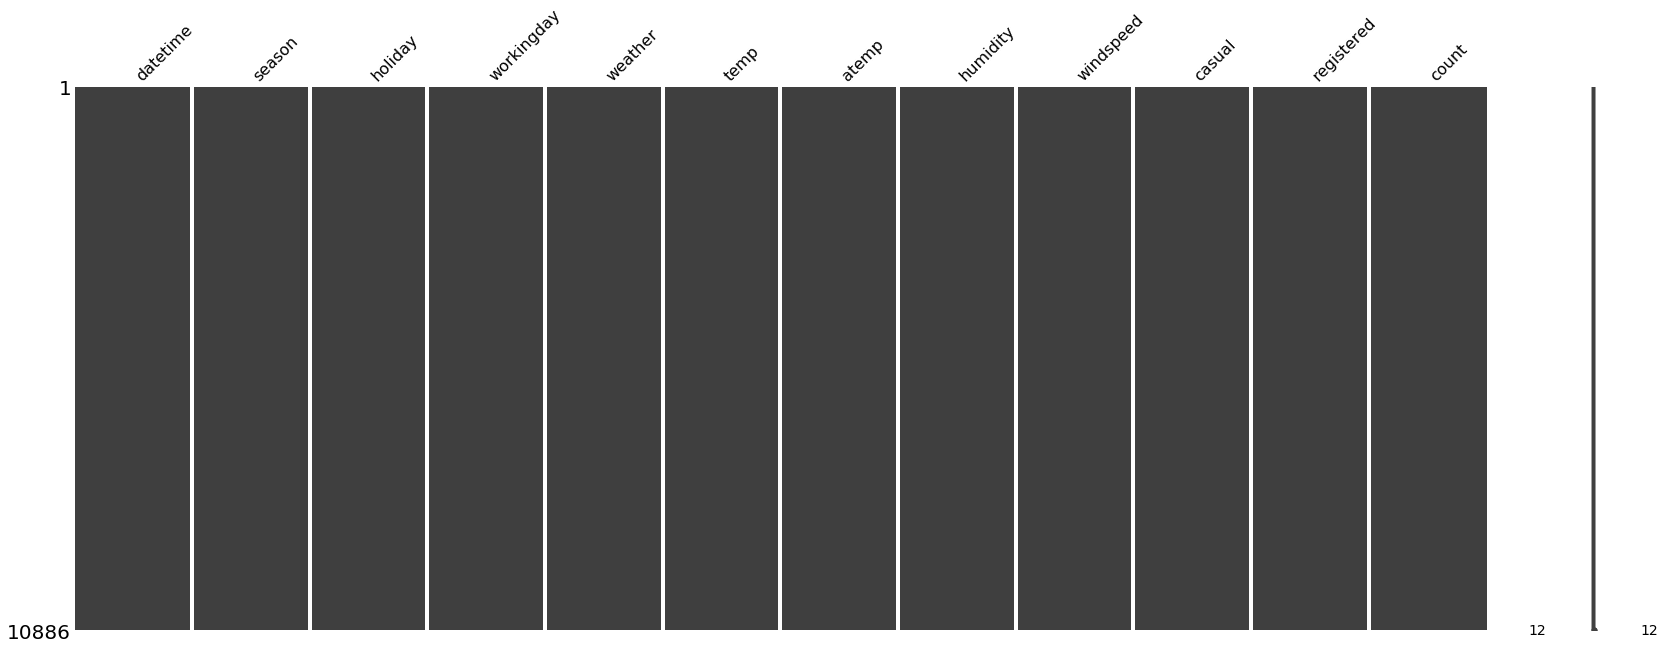

In [7]:
#비어있는 값이 없다는것을 시각화한것.
msno.matrix(train)

In [8]:
#계절항목 중 각 수치의 수를 파악.
train.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

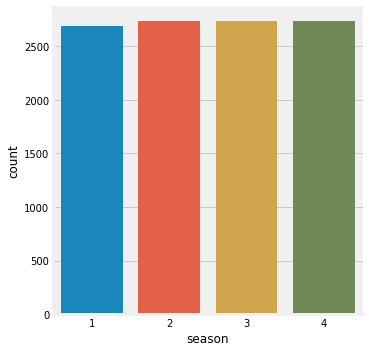

In [9]:
#계절항목의 수를 그래프로 표현
sns.catplot(x='season',data=train,kind='count',height=5,aspect=1.0)

In [10]:
#휴일인지를 확인하여 0은 휴일 1은 휴일이 아닌날
#각 수치의 수를 파악.
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

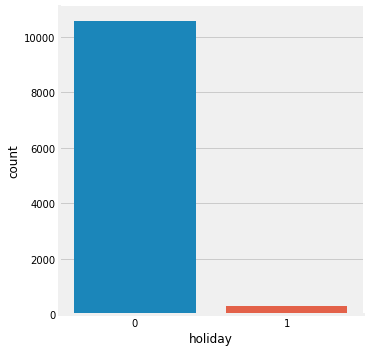

In [11]:
#휴일인지 항목의 수를 그래프로 표현.
sns.catplot(x='holiday',data=train,kind='count',height=5,aspect=1)

In [12]:
#일하는날인지를 확인하여 일하는날은 0, 일하지않는날은 1
#각 수치의 수를 파악.
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

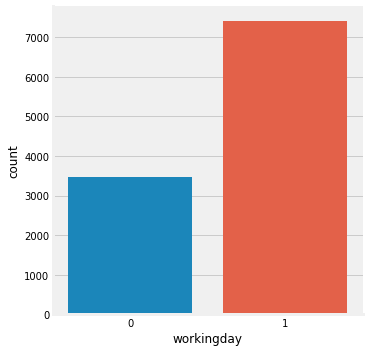

In [13]:
#위 값을 그래프로 표현.
sns.catplot(x='workingday',data=train,kind='count',height=5,aspect=1)

In [14]:
#날씨를 고려하여 1: 맑음, 2: 흐림, 3: 약간의 눈과비, 4: 엄청난 눈과 비
#각 수치의 수를 파악.
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

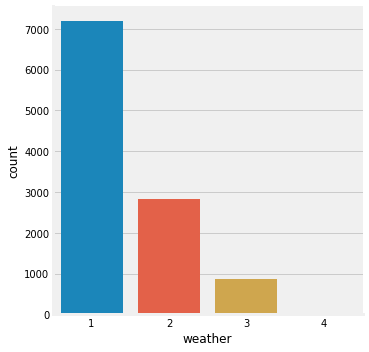

In [15]:
#위 값을 그래프로 표현.
sns.catplot(x='weather',data=train,kind='count',height=5,aspect=1)

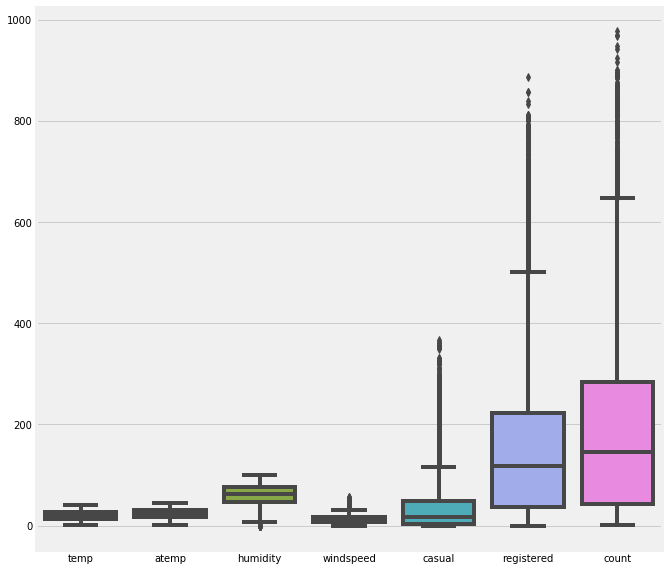

In [16]:
#나머지 수치들을 상자그림 그래프로 시각화.
sns.boxplot(data=train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

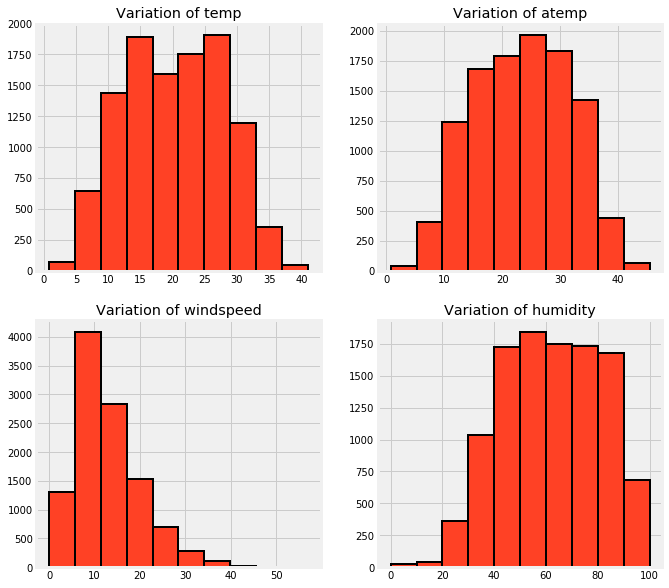

In [17]:
#히스토그램을 이용해 다른 요인들을 시각화.
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

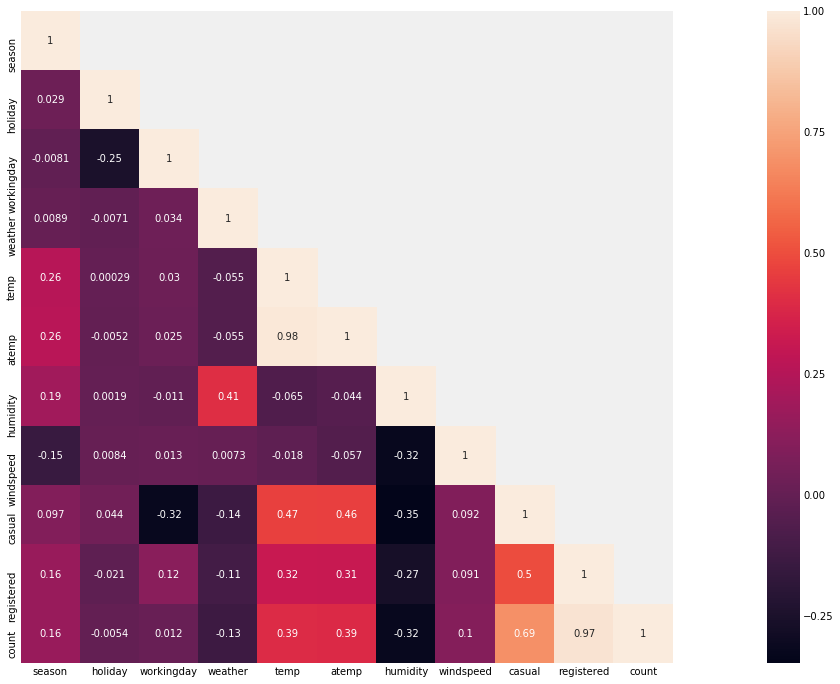

In [18]:
#히트맵을 이용해 각 요인들과의 관계를 시각화.
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

위에 있는 히트맵의 설명
- 자기 자신과의 관계는 1이다.
- temp와 atemp는 밀접하게 연관.
- count와 humidity는 서로 반비례.
  (습도가 높으면 사람들이 자전거를 대여 안함)
- count와 holiday는 서로 반비례.
- count와 weather는 서로 반비례.
- casual과 wokingday는 서로 반비례.
- temp는 count에 매우 영향을 끼침.
- registered/casual은 count와 밀접하게 연관
  (count=registered+casual)

In [19]:
#train 데이터셋의 datetime을 hour, day, month, year로 분류.
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [20]:
#test 데이터셋의 datetime을 hour, day, month, year로 분류.
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0


In [21]:
#train 데이터셋에서 datatime을 삭제.
train.drop('datetime', axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [22]:
#train 데이터셋에서 causal과 registered를 삭제.
train.drop(['casual','registered'], axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,0


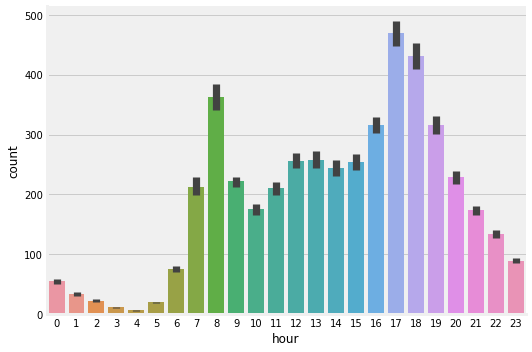

In [23]:
#매 시간별 대여량을 그래프로 시각화.
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)

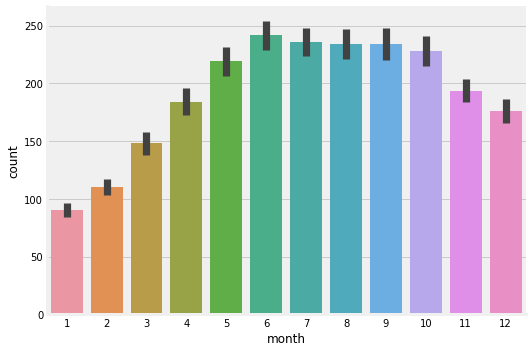

In [24]:
#월 별 대여량을 그래프로 시각화.
#계절별 대여량과 밀접한 관계.
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)

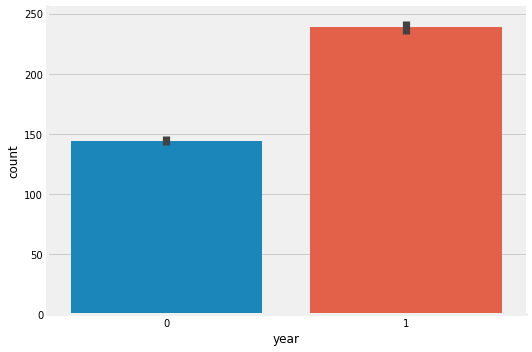

In [25]:
#연도별 대여량을 그래프로 시각화.
#0은 2011년도, 1은 2012년도를 의미.
sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)

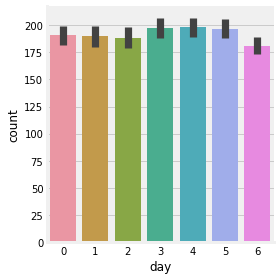

In [27]:
#일별 대여량을 그래프로 시각화.
sns.catplot(x="day",y='count',kind='bar',data=train,height=4,aspect=1)